# Example of the ml_regressor() function 

Author: Charles Le Losq

This function allows one to measure any variable from a set of spectra with using a machine learning technique.

Let's assume for the sack of example that we observe spectra D that are the combination of $k$ endmember spectra S with concentrations C, such that:

$$ D_{i,j} = C_{i,k} \times S_{k,j} $$

Here we assume a linear combination... In Python, assuming that the partial spectra are simple Gaussians, we have

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import rampy as rp
from scipy.stats import norm

In [18]:
x = np.arange(0,600,1.0)

S_1 = norm.pdf(x,loc=200.,scale=130.)
S_2 = norm.pdf(x,loc=400,scale=70)
S_true = np.vstack((S_1,S_2))
print("Shape of partial spectra matrix:"+str(S_true.shape))

C_ = np.random.rand(40) #40 samples with random concentrations between 0 and 1
C_true = np.vstack((C_,(1-C_))).T
print("Shape of concentration matrix:"+str(C_true.shape))


Shape of partial spectra matrix:(2, 600)
Shape of concentration matrix:(40, 2)


# now we have some observation with random noise

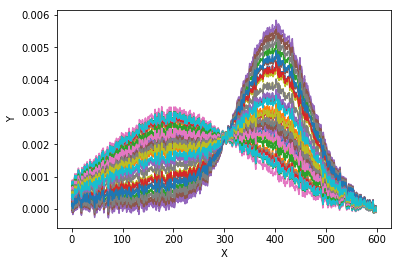

In [22]:
noise = np.random.randn(len(x))*1e-4
Obs = np.dot(C_true,S_true) + noise

plt.plot(x,Obs.T)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# Machine Learning

We can train a machine learning algorithm to follow changes in D as a function of C, assuming we measured both quantities.

Rampy uses scikit_learn algorithms to do so in a easy way, with under-the-hood standardization and cross-validation. This is to use for "simple" projects, while more complicated things will required an ad hoc approach, directly using scikit-learn or any other relevant ML library.

For now, we will show how we can train neural networks to link D and C, such that we can predict C from new observations of D.

Let's first print the help to read the documentation...

In [24]:
help(rp.mlregressor)

Help on function mlregressor in module rampy.ml_regressor:

mlregressor(x, y, algorithm='SVM', **kwargs)
    use machine learning algorithms from scikit learn to perform regression between spectra and a observed variable.
    
    Parameters
    x: array{Float64}
            the spectra organised in rows (1 row = one spectrum). The spectra should share a common X axis.
    y: Array{Float64}
            the targets. Only a single target is possible for now.
    algorithm: String,
            "KernelRidge", "SVM", "LinearRegression", "Lasso", "ElasticNet", "NeuralNet", "BaggingNeuralNet", default = "SVM"
    
    Returns
    prediction_train: Array{Float64}
            the predicted target values for the training y dataset.
    prediction_test: Array{Float64}
            the predicted target values for the testing y_test dataset.
    model: Scikit learn model
            A Scikit Learn object model, see scikit learn library documentation.
    X_scaler:
            A Scikit Learn scaler o

# Choice of the algorithm

As we are dealing with a linear case, we can use the Lasso or ElasticNet algorithms, which are linear regression algorithms.

Machine learning algorithms need a training dataset, and their performance is evaluated on a "testing" dataset that is unseen of the algorithm. rp.mlregressor can split your dataset automatically, or you can choose to provide the two different dataset. Parameters for each algorithm are provided as an dictionary, see the documentation of scikit-learn for further details on them.

rp.mlregressor outputs several things, including the predicted values of the training and testing datasets, the model in itself (an scikit-learn object), as well as the scalers. Indeed, data need to be scaled prior to applying the algorithm, and new data can be scaled with the existing scaler as we will see below.

For now, let's train our lasso algorithm. This is one line of code:

In [32]:
prediction_train, prediction_test, model, X_scaler, Y_Scaler = rp.mlregressor(Obs,C_true[:,0].reshape(-1,1), algorithm="Lasso")

ValueError: Expected 2D array, got 1D array instead:
array=[0.96611157 0.60522682 0.50537632 0.33221276 0.11870584 0.75749003
 0.30332509 0.64930351 0.03747049 0.6884711  0.92568233 0.99523041
 0.8280734  0.16699433 0.22538016 0.80827881 0.52241716 0.72937175
 0.30938763 0.8674324  0.50946176 0.83792267 0.42860753 0.7942376
 0.94552867 0.00666289 0.81649179 0.63765435].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [34]:
Obs.shape

(40, 600)